#### Project 1 = https://www.ebi.ac.uk/pride/archive/projects/PXD002057

#### Project 2 = https://www.ebi.ac.uk/pride/archive/projects/PXD05388

#### Project 3 = https://www.ebi.ac.uk/pride/archive/projects/PXD003594

##### "Canonical" search database contains only UniProt SwissProt canonical protein sequences (Uniprot version 2023_01).

##### "trEMBL" search database includes protein isoforms and trEMBL sequences (Uniprot version 2023_01).

--------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, json, time
from matplotlib_venn import venn2, venn3
from utility_functions import *
DATE

'20250627'

In [2]:
project_palette

{'canon': 'orangered', 'trembl': 'yellowgreen', 'openprot': 'cornflowerblue'}

In [3]:
# indicate directory where all the data is present
# all other paths in the code will be changed accordingly
# using absolute path to the directory to avoid confusion...
working_folder = "C:/Users/Enrico/OneDrive - UGent/run-ionbot"
dataset_name = "PXD002057.v0.11.4"
# dataset_name = "PXD005833.v0.11.4"
# dataset_name = "PXD014258.v0.11.4"

In [4]:
# Make sure the paths work on your pc!
canonical_path = os.path.join(working_folder, dataset_name, f'{dataset_name}-canon',    "combined-results-w-qvalues.csv.gz")
trembl_path    = os.path.join(working_folder, dataset_name, f'{dataset_name}-trembl',   "combined-results-w-qvalues.csv.gz")
openprot_path  = os.path.join(working_folder, dataset_name, f'{dataset_name}-openprot', "combined-results-w-qvalues.csv.gz")

In [5]:
# filtering = False
# filtering = 'global'
# filtering = 'groupwalk'
# filtering = 'custom'
filtering = 'hybrid'

canonical = import_pep_IDs(canonical_path, filtering=filtering)
trembl    = import_pep_IDs(trembl_path,    filtering=filtering)
openprot  = import_pep_IDs(openprot_path,  filtering=filtering)

----

##### Plot Venn Diagrams

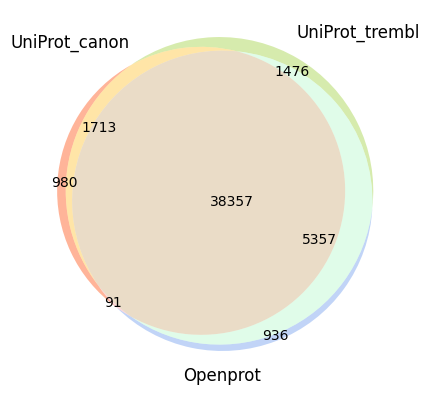

In [6]:
venn3([set(canonical.spectrum_title),set(trembl.spectrum_title),set(openprot.spectrum_title)], 
      set_labels=['UniProt_canon','UniProt_trembl','Openprot'], set_colors=('orangered','yellowgreen','cornflowerblue'))
plt.show()

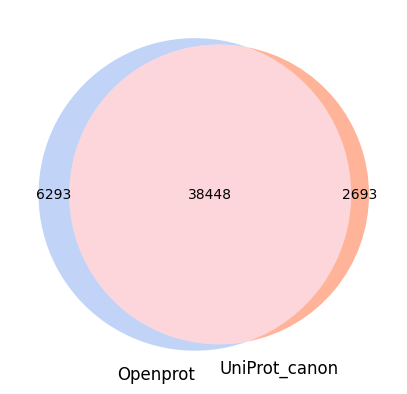

In [7]:
venn2([set(openprot.spectrum_title),set(canonical.spectrum_title)], set_labels=['Openprot','UniProt_canon'], set_colors=('cornflowerblue','orangered'))
plt.show()

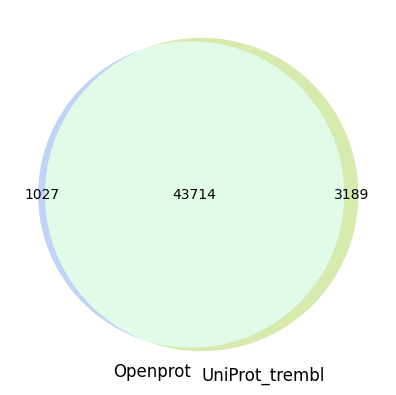

In [8]:
venn2([set(openprot.spectrum_title),set(trembl.spectrum_title)], set_labels=['Openprot','UniProt_trembl'], set_colors=('cornflowerblue','yellowgreen'))
plt.show()

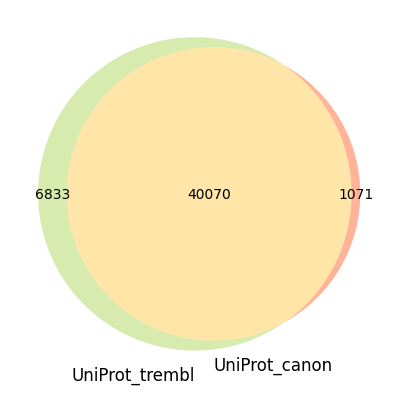

In [9]:
venn2([set(trembl.spectrum_title),set(canonical.spectrum_title)], set_labels=['UniProt_trembl','UniProt_canon'], set_colors=('yellowgreen','orangered'))
plt.show()

----

##### Add ionbot features to the IDs

In [10]:
canon_features = pd.read_csv(os.path.join(working_folder, dataset_name, f'{dataset_name}-canon',
                                          f'{dataset_name}-canon-combined-features.csv.gz'))
print(canonical.shape, canon_features.shape)
canon_features = canonical.merge(canon_features, on=['spectrum_title','scan','spectrum_file'])
print(canon_features.shape)

(41141, 18) (110724, 18)
(41141, 33)


In [11]:
trembl_features = pd.read_csv(os.path.join(working_folder, dataset_name, f'{dataset_name}-trembl',
                                           f'{dataset_name}-trembl-combined-features.csv.gz'))
print(trembl.shape, trembl_features.shape)
trembl_features = trembl.merge(trembl_features, on=['spectrum_title','scan','spectrum_file'])
print(trembl_features.shape)

(46903, 18) (112019, 18)
(46903, 33)


In [12]:
openprot_features = pd.read_csv(os.path.join(working_folder, dataset_name, f'{dataset_name}-openprot',
                                             f'{dataset_name}-openprot-combined-features.csv.gz'))
print(openprot.shape, openprot_features.shape)
openprot_features = openprot.merge(openprot_features, on=['spectrum_title','scan','spectrum_file'])
print(openprot_features.shape)
# the length of the dfs should stay the same, otherwise something went wrong somewhere...

(44741, 18) (116596, 18)
(44741, 33)


In [13]:
# Merge Canonical and OpenProt IDs
# combo = canon_features.merge(openprot_features, on=['spectrum_title','spectrum_file','scan'], 
#                              # how='outer', 
#                              suffixes=['_canon','_open'])
# combo["Same_peptide"] = combo.matched_peptide_canon==combo.matched_peptide_open
# combo["Same_mod_peptide"] = combo.modified_peptide_canon==combo.modified_peptide_open
# combo["Same_mods_noRT"] = (combo.matched_peptide_canon+combo.modifications_noRT_canon)==(combo.matched_peptide_open+combo.modifications_noRT_open)
# savepath = os.path.join(working_folder, dataset_name, f"openprot-x-canonical-filt-{filtering}.csv")
# combo.to_csv(savepath, index=False)
# print(savepath)
# pd.DataFrame(combo[['Same_mod_peptide','Same_mods_noRT','Same_peptide']].value_counts(sort=False))

In [14]:
# Merge TrEMBL and OpenProt IDs
combo2 = trembl_features.merge(openprot_features, on=['spectrum_title','spectrum_file','scan'], 
                             # how='outer', 
                             suffixes=['_trembl','_open'])
combo2["Same_peptide"]     = combo2.matched_peptide_trembl==combo2.matched_peptide_open
combo2["Same_mod_peptide"] = combo2.modified_peptide_trembl==combo2.modified_peptide_open
combo2["Same_mods_noRT"]   = (combo2.matched_peptide_trembl+combo2.modifications_noRT_trembl) == (combo2.matched_peptide_open+combo2.modifications_noRT_open)
savepath = os.path.join(working_folder, dataset_name, f"openprot-x-trembl-filt-{filtering}.csv")
combo2.to_csv(savepath, index=False)
print(savepath)
pd.DataFrame(combo2[['Same_mod_peptide','Same_mods_noRT','Same_peptide']].value_counts(sort=False))

C:/Users/Enrico/OneDrive - UGent/run-ionbot\PXD002057.v0.11.4\openprot-x-trembl-filt-hybrid.csv


count
Same_mod_peptide Same_mods_noRT Same_peptide       
False            False          False          1563
                                True           2024
                 True           True           5344
True             True           True          34783

-----

In [15]:
# Merge TrEMBL and OpenProt IDs (part II)
combo2 = trembl_features.merge(openprot_features, on=['spectrum_title','spectrum_file','scan'], 
                             how='outer', 
                             suffixes=['_trembl','_open'])
combo2["Same_peptide"]     = combo2.matched_peptide_trembl==combo2.matched_peptide_open
combo2["Same_mod_peptide"] = combo2.modified_peptide_trembl==combo2.modified_peptide_open
combo2["Same_mods_noRT"]   = (combo2.matched_peptide_trembl+combo2.modifications_noRT_trembl) == (combo2.matched_peptide_open+combo2.modifications_noRT_open)
savepath = os.path.join(working_folder, dataset_name, f"openprot-x-trembl-filt-{filtering}-outerjoin.csv")
combo2.to_csv(savepath, index=False)
print(savepath)
pd.DataFrame(combo2[['Same_mod_peptide','Same_mods_noRT','Same_peptide']].value_counts(sort=False))

C:/Users/Enrico/OneDrive - UGent/run-ionbot\PXD002057.v0.11.4\openprot-x-trembl-filt-hybrid-outerjoin.csv


count
Same_mod_peptide Same_mods_noRT Same_peptide       
False            False          False          5779
                                True           2024
                 True           True           5344
True             True           True          34783

-----

In [16]:
# check how many Decoy spectra in one search are identified as Targets in the other
# target_decoy_comparison = combo[['database_canon','database_open']].value_counts().reset_index()
# target_decoy_comparison.columns = ['database_canon','database_open','counts']
# target_decoy_comparison

In [17]:
# check how many Decoy spectra in one search are identified as Targets in the other
target_decoy_comparison = combo2[['database_trembl','database_open']].value_counts().reset_index()
target_decoy_comparison.columns = ['database_trembl','database_open','counts']
target_decoy_comparison

,database_trembl,database_open,counts
0,T,T,43490
1,D,D,198
2,D,T,19
3,T,D,7


----

In [18]:
# data = []
# for PXD in ['PXD002057','PXD005833','PXD014258']:
#     tmp = pd.read_csv(f'{working_folder}/{PXD}.v0.11.4/openprot-x-trembl-filt-global.csv')
#     tmp['Dataset'] = PXD
#     data.append(tmp)
# data = pd.concat(data, ignore_index=True)
# pd.DataFrame(data[['Dataset','Same_mods_noRT','Same_peptide']].value_counts(sort=False))

---

In [19]:
# Auto save & export notebook to html!!
autosave(extra_labels='-'+dataset_name[:9]+'-'+filtering)
filtering, dataset_name

True


('hybrid', 'PXD002057.v0.11.4')